CHAPTER 1: DATA TYPE CONSTRAINTS
----

## Chapter 1.1: Data type constraints

Hi and welcome! My name is Adel, and I'll be your host as we learn how to clean data in Python.

### Course outline

In this course, we're going to understand how to diagnose different problems in our data and how they can can come up during our workflow.
We will also understand the side effects of not treating our data correctly and various ways to address different types of dirty data.
In this chapter, we're going to discuss the most common data problems you may encounter and how to address them. So let's get started!

**Why do we need to clean data?**

To understand why we need to clean data, let's remind ourselves of the data science workflow. In a typical data science workflow, we usually access our raw data, explore and process it, develop insights using visualizations or predictive models, and finally report these insights with dashboards or reports.
Dirty data can appear because of duplicate values, mis-spellings, data type parsing errors and legacy systems.
Without making sure that data is properly cleaned in the exploration and processing phase, we will surely compromise the insights and reports subsequently generated. As the old adage says, garbage in garbage out.

**Data type constraints**

When working with data, there are various types that we may encounter along the way. We could be working with text data, integers, decimals, dates, zip codes, and others. Luckily, Python has specific data type objects for various data types that you're probably familiar with by now. This makes it much easier to manipulate these various data types in Python. As such, before preparing to analyze and extract insights from our data, we need to make sure our variables have the correct data types, other wise we risk compromising our analysis.

**Strings to integers**

Let's take a look at the following example. Here's the head of a DataFrame containing revenue generated and quantity of items sold for a sales order. We want to calculate the total revenue generated by all sales orders. As you can see, the Revenue column has the dollar sign on the right hand side. A close inspection of the DataFrame column's data types using the `.dtypes` attribute returns object for the Revenue column, which is what pandas uses to store strings.
We can also check the data types as well as the number of missing values per column in a DataFrame, by using the `.info()` method.
Since the Revenue column is a string, summing across all sales orders returns one large concatenated string containing each row's string. To fix this, we need to first remove the $ sign from the string so that pandas is able to convert the strings into numbers without error. We do this with the .str.strip() method, while specifying the string we want to strip as an argument, which is in this case the dollar sign. Since our dollar values do not contain decimals, we then convert the Revenue column to an integer by using the `.astype()` method, specifying the desired data type as argument. Had our revenue values been decimal, we would have converted the Revenue column to float. We can make sure that the Revenue column is now an integer by using the assert statement, which takes in a condition as input, as returns nothing if that condition is met, and an error if it is not.

**The assert statement**

For example, here we are testing the equality that 1+1 equals 2. Since it is the case, the assert statement returns nothing. However, when testing the equality 1+1 equals 3, we receive an assertionerror. You can test almost anything you can imagine of by using assert, and we'll see more ways to utilize it as we go along the course.

**Numeric or categorical?**

A common type of data seems numeric but actually represents categories with a finite set of possible categories. This is called categorical data. We will look more closely at categorical data in Chapter 2, but let's take a look at this example. Here we have a marriage status column, which is represented by 0 for never married, 1 for married, 2 for separated, and 3 for divorced. However it will be imported of type integer, which could lead to misleading results when trying to extract some statistical summaries.
We can solve this by using the same .astype() method seen earlier, but this time specifying the category data type. When applying the describe again, we see that the summary statistics are much more aligned with that of a categorical variable, discussing the number of observations, number of unique values, most frequent category instead of mean and standard deviation.

### Exercise

**Numeric data or ... ?**

In this exercise, and throughout this chapter, you'll be working with bicycle `ride sharing` data in San Francisco called `ride_sharing`. It contains information on the start and end stations, the trip duration, and some user information for a bike sharing service.

The `user_type` column contains information on whether a user is taking a free ride and takes on the following values:

- `1` for free riders.
- `2` for pay per ride.
- `3` for monthly subscribers.

In this instance, you will print the information of `ride_sharing` using `.info()` and see a firsthand example of how an incorrect data type can flaw your analysis of the dataset.

**Instructions** 

- Print the information of `ride_sharing`.
- Use `.describe()` to print the summary statistics of the `user_type` column from `ride_sharing`.
- Convert `user_type` into categorical by assigning it the `'category'` data type and store it in the `user_type_cat column`.
- Make sure you converted `user_type_cat` correctly by using an `assert` statement.

### Exercise 1.1

**Summing strings and concatenating numbers**

In the previous exercise, you were able to identify that `category` is the correct data type for `user_type` and convert it in order to extract relevant statistical summaries that shed light on the distribution of `user_type`.

Another common data type problem is importing what should be numerical values as strings, as mathematical operations such as summing and multiplication lead to string concatenation, not numerical outputs.

In this exercise, you'll be converting the string column `duration` to the type `int`. Before that however, you will need to make sure to strip `"minutes"` from the column in order to make sure `pandas` reads it as numerical. 

**Instructions**

- Use the `.strip()` method to strip `duration` of `"minutes"` and store it in the `duration_trim` column.
- Convert `duration_trim` to `int` and store it in the `duration_time` column.
- Write an `assert` statement that checks if `duration_time`'s data type is now an `int`.
Print the average ride duration.

## Chapter 1.2: Data range constraints

Hi and welcome back! In this lesson, we're going to discuss data that should fall within a range.

**Motivation**

Let's first start off with some motivation. Imagine we have a dataset of movies with their respective average rating from a streaming service. The rating can be any integer between 1 and 5.
After creating a histogram with maptlotlib, we see that there are a few movies with an average rating of 6, which is well above the allowable range. This is most likely an error in data collection or parsing, where a variable is well beyond its range and treating it is essential to have accurate analysis.
Here's another example, where we see subscription dates in the future for a service. Inherently this doesn't make any sense, as we cannot sign up for a service in the future, but these errors exist either due to technical or human error. We use the datetime package's .date.today() function to get today's date, and we filter the dataset by any subscription date higher than today's date. We need to pay attention to the range of our data.

**How to deal with out of range data?**

There's a variety of options to deal with out of range data. The simplest option is to drop the data. However, depending on the size of your out of range data, you could be losing out on essential information. As a rule of thumb, only drop data when a small proportion of your dataset is affected by out of range values, however you really need to understand your dataset before deciding to drop values. Another option would be setting custom minimums or maximums to your columns. We could also set the data to missing, and impute it, but we'll take a look at how to deal with missing data in Chapter 3. We could also, dependent on the business assumptions behind our data, assign a custom value for any values of our data that go beyond a certain range.

**Movie example**

Let's take a look at the movies example mentioned earlier. We first isolate the movies with ratings higher than 5. Now if these values are affect a small set of our data, we can drop them. We can drop them in two ways - we can either create a new filtered movies DataFrame where we only keep values of avg_rating lower or equal than to 5. Or drop the values by using the drop method. The drop method takes in as argument the row indices of movies for which the avg_rating is higher than 5. We set the inplace argument to True so that values are dropped in place and we don't have to create a new column. We can make sure this is set in place using an assert statement that checks if the maximum of avg_rating is lower or equal than to 5.
Depending on the assumptions behind our data, we can also change the out of range values to a hard limit. For example, here we're setting any value of the avg_rating column in to 5 if it goes beyond it. We can do this using the dot-loc method, which returns all cells that fit a custom row and column index. It takes as first argument the row index, or here all instances of avg_rating above 5 and as second argument the column index, which is here the avg_rating column. Again, we can make sure that this change was done using an assert statement.

**Date range example**

Let's take another look at the date range example mentioned earlier, where we had subscriptions happening in the future. We first look at the data types of the column with the dot-dtypes attribute. We can confirm that the subscription_date column is an object and not a date or datetime object. To compare a pandas object to a date, the first step is to convert it to another date. We do so by first converting it into a pandas datetime object with the to_datetime function from pandas, which takes in as an argument the column we want to convert. We then need to convert the datetime object into a date. This conversion is done by appending dt-dot-date to the code. Could we have converted from an object directly to a date, without the pandas datetime conversion in the middle? Yes! But we'd have had to provide information about the date's format as a string, so it's just as easy to do it this way.
Now that the column is a date, we can treat it in a variety of ways. We first create a today_date variable using the datetime function date-dot-today, which allows us to store today's date. We can then either drop the rows with exceeding dates similar to how we did in the average rating example, or replace exceeding values with today's date. In both cases we can use the assert statement to verify our treatment went well, by comparing the maximum value in the subscription_date column. However, make sure to chain it with the dot-date method to return a date instead of a timestamp.

### Exercise 1.2.1

**Tire size constraints**

In this lesson, you're going to build on top of the work you've been doing with the `ride_sharing` DataFrame. You'll be working with the tire_sizes column which contains data on each bike's `tire size`.

Bicycle tire sizes could be either 26″, 27″ or 29″ and are here correctly stored as a categorical value. In an effort to cut maintenance costs, the ride sharing provider decided to set the maximum tire size to be 27″.

In this exercise, you will make sure the `tire_sizes` column has the correct range by first converting it to an integer, then setting and testing the new upper limit of 27″ for `tire sizes`.

**Instructions**

- Convert the tire_sizes column from category to `'int'`.
- Use `.loc[]` to set all values of `tire_sizes` above 27 to 27.
- Reconvert back `tire_sizes` to `'category'` from `int`.
- Print the description of the `tire_sizes`.

## Exercise 1.2.2

**Back to the future**

A new update to the data pipeline feeding into the `ride_sharing` DataFrame has been updated to register each ride's date. This information is stored in the `ride_date` column of the type `object`, which represents strings in `pandas`.

A bug was discovered which was relaying rides taken today as taken next year. To fix this, you will find all instances of the ride_date column that occur anytime in the future, and set the maximum possible value of this column to today's date. Before doing so, you would need to convert `ride_date` to a `datetime` object.

**Instructions**

- Convert `ride_date` to a `datetime` object using `to_datetime()`, then convert the `datetime` object into a `date` and store it in `ride_dt` column.
- Create the variable `today`, which stores today's date by using the `dt.date.today()` function.
- For all instances of `ride_dt` in the future, set them to today's date.
- Print the maximum date in the `ride_dt` column.


## Chapter 1.3: Uniqueness constraints
Hi and welcome to the final lesson of this chapter. Let's discuss another common data cleaning problem, duplicate values.

**What are duplicate values?**

Duplicate values can be diagnosed when we have the same exact information repeated across multiple rows, for a some or all columns in our DataFrame. In this example DataFrame containing the names, address, height, and weight of individuals, the rows presented have identical values across all columns.
In this one, there are duplicate values for all columns except the height column -- which leads us to think it's more likely a data entry error than an actual other person.

**Why do they happen?**

Apart from data entry and human errors alluded to in the previous slide, duplicate data can also arise because of bugs and design errors whether in business processes or data pipelines.
However they oftenmost arise from the necessary act of joining and consolidating data from various resources, which could retain duplicate values.

**How to find duplicate values?**

Let's first see how to find duplicate values. In this example, we're working with a bigger version of the the height and weight data seen earlier in the video.
We can find duplicates in a DataFrame by using the `.duplicated()` method. It returns a Series of boolean values that are True for duplicate values, and False for non-duplicated values.
We can see exactly which rows are affected by using brackets as such. However, using `.duplicated()` without playing around with the arguments of the method can lead to misleading results, as all the columns are required to have duplicate values by default, with all duplicate values being marked as True except for the first occurrence. This limits our ability to properly diagnose what type of duplication we have, and how to effectively treat it.
To properly calibrate how we go about finding duplicates, we will use 2 arguments from the `.duplicated()` method. The subset argument lets us set a list of column names to check for duplication. For example, it allows us to find duplicates for the first and last name columns only. The keep argument lets us keep the first occurrence of a duplicate value by setting it to the string first, the last occurrence of a duplicate value by setting it the string last, or keep all occurrences of duplicate values by setting it to False. In this example, we're checking for duplicates across the first name, last name, and address variables, and we're choosing to keep all duplicates.
We see the following results -- to get a better bird's eye view of the duplicates,
We sort the duplicate rows using the .sort_values method, choosing first_name to sort by.
We find that there are four sets of duplicated rows, the first 2 being complete duplicates of each other across all columns, highlighted here in red.
The other 2 being incomplete duplicates of each other highlighted here in blue with discrepancies across height and weight respectively.

**How to treat duplicate values?**

The complete duplicates can be treated easily. All that is required is to keep one of them only and discard the others.
This can be done with the `.drop_duplicates()` method, which also takes in the same subset and keep arguments as in the `.duplicated()` method, as well as the inplace argument which drops the duplicated values directly inside the height_weight DataFrame. Here we are dropping complete duplicates only, so it's not necessary nor advisable to set a subset, and since the keep argument takes in first as default, we can keep it as such. Note that we can also set it as last, but not as False as it would keep all duplicates.
This leaves us with the other 2 sets of duplicates discussed earlier, which are the same for first_name, last_name and address, but contain discrepancies in height and weight. Apart from dropping rows with really small discrepancies, we can use a statistical measure to combine each set of duplicated values.
For example, we can combine these two rows into one by computing the average mean between them, or the maximum, or other statistical measures, this is highly dependent on a common sense understanding of our data, and what type of data we have.
We can do this easily using the groupby method, which when chained with the agg method, lets you group by a set of common columns and return statistical values for specific columns when the aggregation is being performed. For example here, we created a dictionary called summaries, which instructs groupby to return the maximum of duplicated rows for the height column, and the mean duplicated rows for the weight column. We then group height_weight by the column names defined earlier, and chained it with the agg method, which takes in the summaries dictionary we created. We chain this entire line with the `.reset_index()` method, so that we can have numbered indices in the final output. We can verify that there are no more duplicate values by running the duplicated method again, and use brackets to output duplicate rows.

### Exercise 1.3.1

**Finding duplicates**

A new update to the data pipeline feeding into `ride_sharing` has added the `bike_id column`, which represents a unique identifier for each ride.

The update however coincided with radically shorter average ride duration times and irregular user birth dates set in the future. Most importantly, the number of rides taken has increased by 20% overnight, leading you to think there might be both complete and incomplete duplicates in the `ride_sharing` DataFrame.

In this exercise, you will confirm this suspicion by finding those duplicates. A sample of `ride_sharing` is in your environment, as well as all the packages you've been working with thus far.

**Instructions**

- Find duplicated rows of `ride_id` in the `ride_sharing` DataFrame while setting `keep` to `False`.
- Subset `ride_sharing` on `duplicates` and sort by `bike_id` and assign the results to `duplicated_rides`.
- Print the `bike_id`, `duration` and `user_birth_year` columns of `duplicated_rides` in that order.

### Exercise 1.3.2

**Treating duplicates**

In the last exercise, you were able to verify that the new update feeding into `ride_sharing` contains a bug generating both complete and incomplete duplicated rows for some values of the `bike_id` column, with occasional discrepant values for the `user_birth_year` and `duration` columns.

In this exercise, you will be treating those duplicated rows by first dropping complete duplicates, and then merging the incomplete duplicate rows into one while keeping the average `duration`, and the minimum `user_birth_year` for each set of incomplete duplicate rows.

**Instructions**

- Drop complete duplicates in `ride_sharing` and store the results in `ride_dup`.
- Create the `statistics` dictionary which holds **min**imum aggregation for `user_birth_year` and **mean** aggregation for `duration`.
- Drop incomplete duplicates by grouping by `bike_id` and applying the aggregation in `statistics`.
- Find duplicates again and run the `assert` statement to verify de-duplication.

In [1]:
# Import the course packages
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import missingno as msno
import fuzzywuzzy
import recordlinkage 

# Import the course dataset
ride_sharing = pd.read_csv('datasets/ride_sharing.mod.csv', index_col = 'Unnamed: 0')

# Print the information of ride_sharing
print(ride_sharing.info())

# Print summary statistics of user_type column
print(ride_sharing['user_type'].describe())

# Convert user_type from integer to category
ride_sharing['user_type_cat'] = ride_sharing['user_type'].astype('category')

# Write an assert statement confirming the change
assert ride_sharing['user_type_cat'].dtype == 'category'

# Print new summary statistics 
print(ride_sharing['user_type_cat'].describe())

# Strip duration of minutes
ride_sharing['duration_trim'] = ride_sharing['duration'].str.strip('minutes')

# Convert duration to integer
ride_sharing['duration_time'] = ride_sharing['duration_trim'].astype('int')

# Write an assert statement making sure of conversion
assert ride_sharing['duration_time'].dtype == 'int'

# Print formed columns and calculate average ride duration 
print(ride_sharing[['duration','duration_trim','duration_time']])
print(ride_sharing['duration_time'].mean())

# 11 minutes is really not bad for an average ride duration in a city like San-Francisco.

# Convert tire_sizes to integer
ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].astype('int')

# Set all values above 27 to 27
ride_sharing.loc[ride_sharing['tire_sizes'] > 27, 'tire_sizes'] = 27

# Reconvert tire_sizes back to categorical
ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].astype('category')

# Print tire size description
print(ride_sharing['tire_sizes'].describe())

# Convert ride_date to date
ride_sharing['ride_dt'] = pd.to_datetime(ride_sharing['ride_date']).dt.date

# Save today's date
today = dt.date.today()

# Set all in the future to today's date
ride_sharing.loc[ride_sharing['ride_dt'] > today, 'ride_dt'] = today

# Print maximum of ride_dt column
print(ride_sharing['ride_dt'].max())

# Find duplicates
duplicates = ride_sharing.duplicated('bike_id', keep=False)

# Sort your duplicated rides
duplicated_rides = ride_sharing[duplicates].sort_values('bike_id')

# Print relevant columns of duplicated_rides
print(duplicated_rides[['bike_id','duration','user_birth_year']])

# Drop complete duplicates from ride_sharing
ride_dup = ride_sharing.drop_duplicates()

# Create statistics dictionary for aggregation function
statistics = {'user_birth_year': 'min', 'duration_time': 'mean'}

# Group by bike_id and compute new statistics
ride_unique = ride_dup.groupby(by = 'bike_id').agg(statistics).reset_index()

# Find duplicated values again
duplicates = ride_unique.duplicated(subset = 'bike_id', keep = False)
duplicated_rides = ride_unique[duplicates == True]

# Assert duplicates are processed
assert duplicated_rides.shape[0] == 0

<class 'pandas.core.frame.DataFrame'>
Index: 25760 entries, 0 to 25759
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   duration         25760 non-null  object
 1   station_A_id     25760 non-null  int64 
 2   station_A_name   25760 non-null  object
 3   station_B_id     25760 non-null  int64 
 4   station_B_name   25760 non-null  object
 5   bike_id          25760 non-null  int64 
 6   user_type        25760 non-null  int64 
 7   user_birth_year  25760 non-null  int64 
 8   user_gender      25760 non-null  object
 9   tire_sizes       25760 non-null  int64 
 10  ride_date        25760 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.4+ MB
None
count    25760.000000
mean         2.008385
std          0.704541
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: user_type, dtype: float64
count     25760
unique        3
top           2


CHAPTER 2: TEXT AND CATEGORICAL DATA PROBLEMS
-----
## Chapter 2.1: Membership constraints

Fantastic work on Chapter 1! You're now equipped to treat more complex, and specific data cleaning problems.

### In this chapter

In this chapter, we're going to take a look at common data problems with text and categorical data, so let's get started.

### Categories and membership constraints

In this lesson, we'll focus on categorical variables. As discussed early in chapter 1, categorical data represent variables that represent predefined finite set of categories. Examples of this range from marriage status, household income categories, loan status and others. To run machine learning models on categorical data, they are often coded as numbers. Since categorical data represent a predefined set of categories, they can't have values that go beyond these predefined categories.

### Why could we have these problems?

We can have inconsistencies in our categorical data for a variety of reasons. This could be due to data entry issues with free text vs dropdown fields, data parsing errors and other types of errors.

### How do we treat these problems?

There's a variety of ways we can treat these, with increasingly specific solutions for different types of inconsistencies. Most simply, we can drop the rows with incorrect categories. We can attempt remapping incorrect categories to correct ones, and more. We'll see a variety of ways of dealing with this throughout the chapter and the course, but for now we'll just focus on dropping data.
An example
Let's first look at an example. Here's a DataFrame named study_data containing a list of first names, birth dates, and blood types. Additionally, a DataFrame named categories, containing the correct possible categories for the blood type column has been created as well.
Notice the inconsistency here? There's definitely no blood type named Z+. Luckily, the categories DataFrame will help us systematically spot all rows with these inconsistencies. It's always good practice to keep a log of all possible values of your categorical data, as it will make dealing with these types of inconsistencies way easier.

### A note on joins

Now before moving on to dealing with these inconsistent values, let's have a brief reminder on joins. The two main types of joins we care about here are anti joins and inner joins. We join DataFrames on common columns between them. Anti joins, take in two DataFrames A and B, and return data from one DataFrame that is not contained in another. In this example, we are performing a left anti join of A and B, and are returning the columns of DataFrames A and B for values only found in A of the common column between them being joined on. Inner joins, return only the data that is contained in both DataFrames. For example, an inner join of A and B, would return columns from both DataFrames for values only found in A and B, of the common column between them being joined on.

### A left anti join on blood types

In our example, an left anti join essentially returns all the data in study data with inconsistent blood types,

### An inner join on blood types

and an inner join returns all the rows containing consistent blood types signs.

### Finding inconsistent categories**

Now let's see how to do that in Python. We first get all inconsistent categories in the blood_type column of the study_data DataFrame. We do that by creating a set out of the blood_type column which stores its unique values, and use the difference method which takes in as argument the blood_type column from the categories DataFrame. This returns all the categories in blood_type that are not in categories. We then find the inconsistent rows by finding all the rows of the blood_type columns that are equal to inconsistent categories by using the isin method, this returns a series of boolean values that are True for inconsistent rows and False for consistent ones. We then subset the study_data DataFrame based on these boolean values, and voila we have our inconsistent data.

### Dropping inconsistent categories

To drop inconsistent rows and keep ones that are only consistent. We just use the tilde symbol while subsetting which returns everything except inconsistent rows

## Exercise 2.1

### Finding consistency

In this exercise and throughout this chapter, you'll be working with the `airlines` DataFrame which contains survey responses on the San Francisco Airport from airline customers.

The DataFrame contains flight metadata such as the airline, the destination, waiting times as well as answers to key questions regarding cleanliness, safety, and satisfaction. Another DataFrame named `categories` was created, containing all correct possible values for the survey columns.

In this exercise, you will use both of these DataFrames to find survey answers with inconsistent values, and drop them, effectively performing an outer and inner join on both these DataFrames as seen in the video exercise.

### Instructions

- Print the `categories` DataFrame and take a close look at all possible correct categories of the survey columns.
- Print the unique values of the survey columns in `airlines` using the `.unique()` method.
- Create a set out of the `cleanliness` column in `airlines` using `set()` and find the inconsistent category by finding the **difference** in the `cleanliness` column of `categories`.
- Find rows of `airlines` with a `cleanliness` value not in `categories` and print the output.
- Print the rows with the consistent categories of `cleanliness` only.


## Chapter 2.2: Categorical variables

Awesome work on the last lesson. Now let's discuss other types of problems that could affect categorical variables.

### What type of errors could we have?
In the last lesson, we saw how categorical data has a value membership constraint, where columns need to have a predefined set of values. However, this is not the only set of problems we may encounter. When cleaning categorical data, some of the problems we may encounter include value inconsistency, the presence of too many categories that could be collapsed into one, and making sure data is of the right type.

### Value consistency

Let's start with making sure our categorical data is consistent. A common categorical data problem is having values that slightly differ because of capitalization. Not treating this could lead to misleading results when we decide to analyze our data, for example, let's assume we're working with a demographics dataset, and we have a marriage status column with inconsistent capitalization. Here's what counting the number of married people in the marriage_status Series would look like. Note that the `.value_counts()` methods works on Series only.
For a DataFrame, we can groupby the column and use the `.count()` method.
To deal with this, we can either capitalize or lowercase the marriage_status column. This can be done with the `str.upper()` or `.lower()` functions respectively.
Another common problem with categorical values are leading or trailing spaces. For example, imagine the same demographics DataFrame containing values with leading spaces. Here's what the counts of married vs unmarried people would look like. Note that there is a married category with a trailing space on the right, which makes it hard to spot on the output, as opposed to unmarried.
To remove leading spaces, we can use the `.str.strip()` method which when given no input, strips all leading and trailing white spaces.

### Collapsing data into categories

Sometimes, we may want to create categories out of our data, such as creating household income groups from income data. To create categories out of data, let's use the example of creating an income group column in the demographics DataFrame. We can do this in 2 ways. The first method utilizes the qcut function from pandas, which automatically divides our data based on its distribution into the number of categories we set in the q argument, we created the category names in the group_names list and fed it to the labels argument, returning the following. Notice that the first row actually misrepresents the actual income of the income group, as we didn't instruct qcut where our ranges actually lie.
We can do this with the cut function instead, which lets us define category cutoff ranges with the bins argument. It takes in a list of cutoff points for each category, with the final one being infinity represented with `np.inf()`. From the output, we can see this is much more correct.
Sometimes, we may want to reduce the amount of categories we have in our data. Let's move on to mapping categories to fewer ones. For example, assume we have a column containing the operating system of different devices, and contains these unique values. Say we want to collapse these categories into 2, DesktopOS, and MobileOS. We can do this using the replace method. It takes in a dictionary that maps each existing category to the category name you desire. In this case, this is the mapping dictionary. A quick print of the unique values of operating system shows the mapping has been complete.


## Exercise 2.2.1

### Inconsistent categories

In this exercise, you'll be revisiting the `airlines` DataFrame from the previous lesson.

As a reminder, the DataFrame contains flight metadata such as the airline, the destination, waiting times as well as answers to key questions regarding cleanliness, safety, and satisfaction on the San Francisco Airport.

In this exercise, you will examine two categorical columns from this DataFrame, `dest_region` and `dest_size` respectively, assess how to address them and make sure that they are cleaned and ready for analysis.

### Instructions

- Print the unique values in `dest_region` and `dest_size` respectively.
- Change the capitalization of all values of `dest_region` to lowercase.
- Replace the `'eur'` with `'europe'` in `dest_region` using the `.replace()` method.
- Strip white spaces from the `dest_size` column using the `.strip()` method.
- Verify that the changes have been into effect by printing the unique values of the columns using `.unique()`.

## Exercise 2.2.2

### Remapping categories

To better understand survey respondents from `airlines`, you want to find out if there is a relationship between certain responses and the day of the week and wait time at the gate.

The `airlines` DataFrame contains the `day` and `wait_min` columns, which are categorical and numerical respectively. The `day` column contains the exact day a flight took place, and `wait_min` contains the amount of minutes it took travelers to wait at the gate. To make your analysis easier, you want to create two new categorical variables:

`wait_type`: `'short'` for 0-60 min, `'medium'` for 60-180 and `long` for 180+

`day_week`: `'weekday'` if day is in the weekday, `'weekend'` if day is in the weekend.

### Instructions

- Create the ranges and labels for the `wait_type` column mentioned in the description.
- Create the `wait_type` column by from `wait_min` by using `pd.cut()`, while inputting `label_ranges` and `label_names` in the correct arguments.
- Create the `mapping` dictionary mapping weekdays to `'weekday'` and weekend days to `'weekend'`.
- Create the `day_week` column by using `.replace()`.

## Chapter 2.3: Cleaning text data

Good job on the previous lesson. In the final lesson of this chapter, we'll talk about text data and regular expressions.

### What is text data?

Text data is one of the most common types of data types. Examples of it range from names, phone numbers, addresses, emails and more. Common text data problems include handling inconsistencies, making sure text data is of a certain length, typos and others.

### Example

Let's take a look at the following example. Here's a DataFrame named phones containing the full name and phone numbers of individuals. Both are string columns. Notice the phone number column.
We can see that there are phone number values, that begin with 00 or +. We also see that there is one entry where the phone number is 4 digits, which is non-existent. Furthermore, we can see that there are dashes across the phone number column. If we wanted to feed these phone numbers into an automated call system, or create a report discussing the distribution of users by area code, we couldn't really do so without uniform phone numbers.
Ideally, we'd want to the phone number column as such. Where all phone numbers are aligned to begin with 00, where any number below the 10 digit value is replaced with NaN to represent a missing value, and where all dashes have been removed. Let's see how that's done!

### Fixing the phone number column

Let's first begin by replacing the plus sign with 00, to do this, we use the dot str dot replace method which takes in two values, the string being replaced, which is in this case the plus sign and the string to replace it with which is in this case 00. We can see that the column has been updated.
We use the same exact technique to remove the dashes, by replacing the dash symbol with an empty string.
Now finally we're going to replace all phone numbers below 10 digits to NaN. We can do this by chaining the Phone number column with the dot str dot len method, which returns the string length of each row in the column. We can then use the dot loc method, to index rows where digits is below 10, and replace the value of Phone number with numpy's nan object, which is here imported as np.
We can also write assert statements to test whether the phone number column has a specific length,and whether it contains the symbols we removed. The first assert statement tests that the minimum length of the strings in the phone number column, found through str dot len, is bigger than or equal to 10. In the second assert statement, we use the str dot contains method to test whether the phone number column contains a specific pattern. It returns a series of booleans for that are True for matches and False for non-matches. We set the pattern plus bar pipe minus, the bar pipe here is basically an or statement, so we're trying to find matches for either symbols. We chain it with the any method which returns True if any element in the output of our dot-str-contains is True, and test whether the it returns False.

### But what about more complicated examples?

But what about more complicated examples? How can we clean a phone number column that looks like this for example? Where phone numbers can contain a range of symbols from plus signs, dashes, parenthesis and maybe more. This is where regular expressions come in. Regular expressions give us the ability to search for any pattern in text data, like only digits for example. They are like control + find in your browser, but way more dynamic and robust.

### Regular expressions in action

Let's a look at this example. Here we are attempting to only extract digits from the phone number column. To do this, we use the dot str dot replace method with the pattern we want to replace with an empty string. Notice the pattern fed into the method. This is essentially us telling pandas to replace anything that is not a digit with nothing. We won't get into the specifics of regular expressions, and how to construct them, but they are immensely useful for difficult string cleaning tasks, so make sure to check out DataCamp's course library on regular expressions.

## Exercise 2.3.1

### Removing titles and taking names

While collecting survey respondent metadata in the `airlines` DataFrame, the full name of respondents was saved in the `full_name` column. However upon closer inspection, you found that a lot of the different names are prefixed by honorifics such as `"Dr."`, `"Mr."`, `"Ms."` and `"Miss"`

Your ultimate objective is to create two new columns named `first_name` and `last_name`, containing the first and last names of respondents respectively. Before doing so however, you need to remove honorifics.

### Instructions

- Remove `"Dr."`, `"Mr."`, `"Miss"` and `"Ms."` from `full_name` by replacing them with an empty string `""` in that order.
- Run the `assert` statement using `.str.contains()` that tests whether `full_name` still contains any of the honorifics.


## Exercise 2.3.2

### Keeping it descriptive

To further understand travelers' experiences in the San Francisco Airport, the quality assurance department sent out a qualitative questionnaire to all travelers who gave the airport the worst score on all possible categories. The objective behind this questionnaire is to identify common patterns in what travelers are saying about the airport.

Their response is stored in the `survey_response` column. Upon a closer look, you realized a few of the answers gave the shortest possible character amount without much substance. In this exercise, you will isolate the responses with a character count higher than _40_ , and make sure your new DataFrame contains responses with _40_ characters or more using an `assert` statement.

### Instructions

- Using the `airlines` DataFrame, store the length of each instance in the `survey_response` column in `resp_length` by using `.str.len()`.
- Isolate the rows of `airlines` with `resp_length` higher than `40`.
- Assert that the smallest `survey_response` length in `airlines_survey` is now bigger than `40`.


In [2]:
# Import the course packages
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import missingno as msno
import fuzzywuzzy
import recordlinkage 

categories = {'cleanliness': ['Clean', 'Average', 'Somewhat clean', 'Somewhat dirty', 'Dirty'],
             'safety': ['Neutral', 'Very safe', 'Somewhat safe', 'Very unsafe', 'Somewhat unsafe'],
             'satisfaction': ['Very satisfied', 'Neutral', 'Somewhat satisfied', 'Somewhat unsatisfied', 'Very unsatisfied']}

categories = pd.DataFrame(categories)

# Import the course dataset
airlines = pd.read_csv('datasets/airlines.mod.csv',  index_col = 'Unnamed: 0')


# Print unique values of survey columns in airlines
print('Cleanliness: ', airlines['cleanliness'].unique(), "\n")
print('Safety: ', airlines['safety'].unique(), "\n")
print('Satisfaction: ', airlines['satisfaction'].unique(), "\n")

# Find the cleanliness category in airlines not in categories DataFrame
cat_clean = set(airlines['cleanliness']).difference(categories['cleanliness'])

# Find rows with that category
cat_clean_rows = airlines['cleanliness'].isin(cat_clean)

# Print rows with inconsistent category
print(airlines[cat_clean_rows])

# Print rows with consistent categories only using Tilde symbol (~)
print(airlines[~cat_clean_rows])

# Print unique values of both columns
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

# Lower dest_region column and then replace "eur" with "europe"
airlines['dest_region'] = airlines['dest_region'].str.lower()
airlines['dest_region'] = airlines['dest_region'].replace({'eur':'europe'})

# Remove white spaces from `dest_size`
airlines['dest_size'] = airlines['dest_size'].str.strip()

# Verify changes have been effected
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

# Create ranges for categories
label_ranges = [0, 60, 180, np.inf]
label_names = ['short', 'medium', 'long']

# Create wait_type column
airlines['wait_type'] = pd.cut(airlines['wait_min'], bins = label_ranges, 
                                labels = label_names)

# Create mappings and replace
mappings = {'Monday':'weekday', 'Tuesday':'weekday', 'Wednesday': 'weekday', 
            'Thursday': 'weekday', 'Friday': 'weekday', 
            'Saturday': 'weekend', 'Sunday': 'weekend'}

airlines['day_week'] = airlines['day'].replace(mappings)

# You just created two new categorical variables, that when combined with other columns, could produce really interesting analysis. Don't forget, you can always use an assert statement to check your changes passed.

# Replace "Dr." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Dr.","")

# Replace "Mr." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Mr.","")

# Replace "Miss" with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Miss","")

# Replace "Ms." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Ms.","")

# Assert that full_name has no honorifics
assert airlines['full_name'].str.contains('Ms.|Mr.|Miss|Dr.').any() == False

# Store length of each row in survey_response column
resp_length = airlines['survey_response'].str.len()

# Find rows in airlines where resp_length > 40
airlines_survey = airlines[resp_length > 40]

# Assert minimum survey_response length is > 40
assert airlines_survey['survey_response'].str.len().min() > 40

# Print new survey_response column
print(airlines_survey['survey_response'])

# These types of feedbacks are essential to improving any service. Coupled with some wordcount analysis, you can find common patterns across all survey responses in no time!

Cleanliness:  ['Clean' 'Average' 'Somewhat clean' 'Somewhat dirty' 'Dirty'] 

Safety:  ['Neutral' 'Very safe' 'Somewhat safe' 'Very unsafe' 'Somewhat unsafe'] 

Satisfaction:  ['Very satisfied' 'Neutral' 'Somewhat satsified' 'Somewhat unsatisfied'
 'Very unsatisfied'] 

Empty DataFrame
Columns: [id, day, airline, destination, dest_region, dest_size, boarding_area, dept_time, wait_min, cleanliness, safety, satisfaction, full_name, survey_response]
Index: []
        id        day        airline        destination    dest_region  \
0     1351    Tuesday    UNITED INTL             KANSAI           Asia   
1      373     Friday         ALASKA  SAN JOSE DEL CABO  Canada/Mexico   
2     2820   Thursday          DELTA        LOS ANGELES        West US   
3     1157    Tuesday      SOUTHWEST        LOS ANGELES        West US   
4     2992  Wednesday       AMERICAN              MIAMI        East US   
...    ...        ...            ...                ...            ...   
2804  1475    Tuesday

CHAPTER 3: ADVANCED DATA PROBLEMS
-----

## Chapter 3.1: Uniformity

Stellar work on chapter 2! You're now an expert at handling categorical and text variables.

### In this chapter

In this chapter, we're looking at more advanced data cleaning problems, such as uniformity, cross field validation and dealing with missing data.

### Data range constraints

In chapter 1, we saw how out of range values are a common problem when cleaning data, and that when left untouched, can skew your analysis.

### Uniformity

In this lesson, we're going to tackle a problem that could similarly skew our data, which is unit uniformity. For example, we can have temperature data that has values in both Fahrenheit and Celsius, weight data in Kilograms and in stones, dates in multiple formats, and so on. Verifying unit uniformity is imperative to having accurate analysis.

### An example

Here's a dataset with average temperature data throughout the month of March in New York City. The dataset was collected from different sources with temperature data in Celsius and Fahrenheit merged together. We can see that unless a major climate event occurred, this value here is most likely Fahrenheit, not Celsius. Let's confirm the presence of these values visually.
We can do so by plotting a scatter plot of our data. We can do this using matplotlib.pyplot, which was imported as plt. We use the plt dot scatter function, which takes in what to plot on the x axis, the y axis, and which data source to use. We set the title, axis labels with the helper functions seen here, show the plot with plt dot show,

### Insert title here...

and voila.
Notice these values here? They all must be fahrenheit.

### Treating temperature data

A simple web search returns the formula for converting Fahrenheit to Celsius. To convert our temperature data, we isolate all rows of temperature column where it is above 40 using the loc method. We chose 40 because it's a common sense maximum for Celsius temperatures in New York City. We then convert these values to Celsius using the formula above, and reassign them to their respective Fahrenheit values in temperatures. We can make sure that our conversion was correct with an assert statement, by making sure the maximum value of temperature is less than 40.

### Treating date data

Here's another common uniformity problem with date data. This is a DataFrame called birthdays containing birth dates for a variety of individuals. It has been collected from a variety of sources and merged into one.
Notice the dates here? The one in blue has the month, day, year format, whereas the one in orange has the month written out. The one in red is obviously an error, with what looks like a day day year format. We'll learn how to deal with that one as well.

### Datetime formatting

We already discussed datetime objects. Without getting too much into detail, datetime accepts different formats that help you format your dates as pleased. The pandas to datetime function automatically accepts most date formats, but could raise errors when certain formats are unrecognizable. You don't have to memorize these formats, just know that they exist and are easily searchable!

### Treating date data

You can treat these date inconsistencies easily by converting your date column to datetime. We can do this in pandas with the to_datetime function. However this isn't enough and will most likely return an error, since we have dates in multiple formats, especially the weird day/day/format which triggers an error with months. Instead we set the infer_datetime_format argument to True, and set errors equal to coerce. This will infer the format and return missing value for dates that couldn't be identified and converted instead of a value error.
This returns the birthday column with aligned formats, with the initial ambiguous format of day day year, being set to NAT, which represents missing values in Pandas for datetime objects.
We can also convert the format of a datetime column using the dt dot strftime method, which accepts a datetime format of your choice. For example, here we convert the Birthday column to day month year, instead of year month day.

### Treating ambiguous date data

However a common problem is having ambiguous dates with vague formats. For example, is this date value set in March or August? Unfortunately there's no clear cut way to spot this inconsistency or to treat it. Depending on the size of the dataset and suspected ambiguities, we can either convert these dates to NAs and deal with them accordingly. If you have additional context on the source of your data, you can probably infer the format. If the majority of subsequent or previous data is of one format, you can probably infer the format as well. All in all, it is essential to properly understand where your data comes from, before trying to treat it, as it will make making these decisions much easier.

## Exercise 3.1.1

### Uniform currencies

In this exercise and throughout this chapter, you will be working with a retail banking dataset stored in the `banking` DataFrame. The dataset contains data on the amount of money stored in accounts (`acct_amount`), their currency (`acct_cur`), amount invested (`inv_amount`), account opening date (`account_opened`), and last transaction date (`last_transaction`) that were consolidated from American and European branches.

You are tasked with understanding the average account size and how investments vary by the size of account, however in order to produce this analysis accurately, you first need to unify the currency amount into dollars.

### Instructions

- Find the rows of `acct_cur` in `banking` that are equal to `'euro'` and store them in the variable `acct_eu`.
- Find all the rows of `acct_amount` in `banking` that fit the `acct_eu` condition, and convert them to USD by multiplying them with `1.1`.
- Find all the rows of `acct_cur` in `banking` that fit the `acct_eu` condition, set them to `'dollar'`.

## Exercise 3.1.2

### Uniform dates

After having unified the currencies of your different account amounts, you want to add a temporal dimension to your analysis and see how customers have been investing their money given the size of their account over each year. The `account_opened` column represents when customers opened their accounts and is a good proxy for segmenting customer activity and investment over time.

However, since this data was consolidated from multiple sources, you need to make sure that all dates are of the same format. You will do so by converting this column into a `datetime` object, while making sure that the format is inferred and potentially incorrect formats are set to missing.

### Instructions

- Print the header of `account_opened` from the `banking` DataFrame and take a look at the different results.
- Convert the `account_opened` column to `datetime`, while making sure the date format is inferred and that erroneous formats that raise error return a missing value.
- Extract the year from the amended `account_opened` column and assign it to the `acct_year` column.
- Print the newly created `acct_year` column.


## Chapter 3.2: Cross field validation

Hi and welcome to the second lesson of this chapter! In this lesson we'll talk about cross field validation for diagnosing dirty data.

### Motivation

Let's take a look at the following dataset. It contains flight statistics on the total number of passengers in economy, business and first class as well as the total passengers for each flight. We know that these columns have been collected and merged from different data sources, and a common challenge when merging data from different sources is data integrity, or more broadly making sure that our data is correct.

### Cross field validation

This is where cross field validation comes in. Cross field validation is the use of multiple fields in your dataset to sanity check the integrity of your data. For example in our flights dataset, this could be summing economy, business and first class values and making sure they are equal to the total passengers on the plane. This could be easily done in Pandas, by first subsetting on the columns to sum, then using the sum method with the axis argument set to 1 to indicate row wise summing. We then find instances where the total passengers column is equal to the sum of the classes. And find and filter out instances of inconsistent passenger amounts by subsetting on the equality we created with brackets and the tilde symbol.
Here's another example containing user IDs, birthdays and age values for a set of users. We can for example make sure that the age and birthday columns are correct by subtracting the number of years between today's date and each birthday.
We can do this by first making sure the Birthday column is converted to datetime with the pandas to datetime function. We then create an object storing today's date using the datetime package's date dot today function. We then calculate the difference in years between today's date's year, and the year of each birthday by using the dot dt dot year attribute of the user's Birthday column. We then find instances where the calculated ages are equal to the actual age column in the users DataFrame. We then find and filter out the instances where we have inconsistencies using subsetting with brackets and the tilde symbol on the equality we created.

### What to do when we catch inconsistencies?

So what should be the course of action in case we spot inconsistencies with cross-field validation? Just like other data cleaning problems, there is no one size fits all solution, as often the best solution requires an in depth understanding of our dataset. We can decide to either drop inconsistent data, set it to missing and impute it, or apply some rules due to domain knowledge. All these routes and assumptions can be decided upon only when you have a good understanding of where your dataset comes from and the different sources feeding into it.

## Exercise 3.2

### How's our data integrity?
New data has been merged into the `banking` DataFrame that contains details on how investments in the `inv_amount` column are allocated across four different funds A, B, C and D.

Furthermore, the age and birth_date of customers are now stored in the `Age` and `birth_date` columns respectively.

You want to understand how customers of different age groups invest. However, you want to first make sure the data you're analyzing is correct. You will do so by cross field checking values of `inv_amount` and `Age` against the amount invested in different funds and customers' birthdays.

### Instructions 

1. Find the rows where the sum of all rows of the `fund_columns` in banking are equal to the `inv_amount` column.
Store the values of banking with consistent `inv_amount` in `consistent_inv`, and those with inconsistent ones in `inconsistent_inv`.
2. Store today's date into `today`, and manually calculate `customers'` ages and store them in `ages_manual`.
Find all rows of banking where the `age` column is equal to `ages_manual` and then filter banking into `consistent_ages` and `inconsistent_ages`.

## Chapter 3.3: Completeness

Hi and welcome to the last lesson of this chapter. In this lesson, we're going to discuss completeness and missing data.

### What is missing data?

Missing data is one of the most common and most important data cleaning problems. Essentially, missing data is when no data value is stored for a variable in an observation. Missing data is most commonly represented as NA or NaN, but can take on arbitrary values like 0 or dot. Like a lot of the problems that we've seen thus far in the course, it's commonly due to technical or human errors. Missing data can take many forms, so let's take a look at an example.

### Airquality example

Let's take a look at the airquality dataset. It contains temperature and CO2 measurements for different dates.
We can see that the CO2 value in this row is represented as NaN
We can find rows with missing values by using the dot is na method, which returns True for missing values and False for complete values across all our rows and columns.
We can also chain the isna method with the sum method, which returns a breakdown of missing values per column in our dataframe. We notice that the CO2 column is the only column with missing values - let's find out why and dig further into the nature of this missingness by first visualizing our missing values.

### Missingno

The missingno package allows to create useful visualizations of our missing data. Digging into its details is not part of the course, but you can also check out other courses on missing data in DataCamp's course library. We visualize the missingness of the airquality DataFrame with the msno dot matrix function, and show it with pyplot's show function from matplotlib, which returns the following image. This matrix essentially shows how missing values are distributed across a column. We see that missing CO2 values are randomly scattered throughout the column, but is that really the case? Let's dig deeper.

### Airquality example

We first isolate the rows of airquality with missing CO2 values in one DataFrame, and complete CO2 values in another.
Then, let's use the describe method on each of the created DataFrames.
We see that for all missing values of CO2, they occur at really low temperatures, with the mean temperature at minus 39 degrees and a minimum and maximum of -49 and -30 respectively. Let's confirm this visually with the missngno package.

### Insert title here...

We first sort the DataFrame by the temperature column. Then we input the sorted dataframe to the matrix function from msno. This leaves us with this matrix.
Notice how all missing values are on the top? This is because values are sorted from smallest to largest by default. This essentially confirms that CO2 measurements are lost for really low temperatures. Must be a sensor failure!

### Missingness types

This leads us to missingness types. Without going too much into the details, there are a variety of types of missing data. It could missing completely at random, missing at random, or missing not at random.
Missing completely at random data is when there missing data completely due to randomness, and there is no relationship between missing data and remaining values, such data entry errors.
Despite a slightly deceiving name, Missing at random data is when there is a relationship between missing data and other observed values, such as our CO2 data being missing for low temperatures.
When data is missing not at random, there is a systematic relationship between the missing data and unobserved values. For example, when it's really hot outside, the thermometer might stop working, so we don't have temperature measurements for days with high temperatures. However, we have no way to tell this just from looking at the data since we can't actually see what the missing temperatures are.

### How to deal with missing data?

There's a variety of ways of dealing with missing data, from dropping missing data, to imputing them with statistical measures such as mean, median or mode, or imputing them with more complicated algorithmic approaches or ones that require some machine learning. Each missingness type requires a specific approach, and each type of approach has drawbacks and positives, so make sure to dig deeper in DataCamp's course library on dealing with missing data.

### Dealing with missing data

In this lesson, we'll just explore the simple approaches to dealing with missing data. Let's grab another look at the header of airquality.

### Dropping missing values

We can drop missing values, by using the dot dropna method, alongside the subset argument which lets us pick which column's missing values to drop.

### Replacing with statistical measures

We can also replace the missing values of CO2 with the mean value of CO2, by using the fillna method, which is in this case 1.73. Fillna takes in a dictionary with columns as keys, and the imputed value as values. We can even feed custom values into fillna pertaining to our missing data if we have enough domain knowledge about our dataset.

## Exercise 3.3.1

### Missing investors

Dealing with missing data is one of the most common tasks in data science. There are a variety of types of missingness, as well as a variety of types of solutions to missing data.

You just received a new version of the `banking` DataFrame containing data on the amount held and invested for new and existing customers. However, there are rows with missing `inv_amount` values.

You know for a fact that most customers below 25 do not have investment accounts yet, and suspect it could be driving the missingness.

### Instructions 

- Print the number of missing values by column in the `banking` DataFrame.
- Plot and show the missingness matrix of `banking` with the `msno.matrix()` function.
- Isolate the values of `banking` missing values of `inv_amount` into `missing_investors` and with non-missing `inv_amount` values into `investors`.
- Sort the `banking` DataFrame by the `age` column and plot the missingness matrix of `banking_sorted`.

### Exercise 3.3.2

### Follow the money

In this exercise, you're working with another version of the `banking` DataFrame that contains missing values for both the `cust_id` column and the `acct_amount` column.

You want to produce analysis on how many unique customers the bank has, the average amount held by customers and more. You know that rows with missing `cust_id` don't really help you, and that on average `acct_amount` is usually 5 times the amount of `inv_amount`.

In this exercise, you will drop rows of `banking` with missing `cust_id`s, and impute missing values of `acct_amount` with some domain knowledge.

### Instructions

- Use `.dropna()` to drop missing values of the `cust_id` column in `banking` and store the results in `banking_fullid`.
- Use `inv_amount` to compute the estimated account amounts for `banking_fullid` by setting the amounts equal to `inv_amount * 5`, and assign the results to `acct_imp`.
- Impute the missing values of `acct_amount` in `banking_fullid` with the newly created `acct_imp` using `.fillna()`.


0          2018-03-05
1            28-02-19
2    January 26, 2018
3            21-14-17
4            14-05-18
Name: account_opened, dtype: object
0     2018
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
95     NaN
96     NaN
97     NaN
98     NaN
99     NaN
Name: acct_year, Length: 100, dtype: object
<class 'pandas.core.series.Series'>
Index: 100 entries, 0 to 99
Series name: birth_date
Non-Null Count  Dtype 
--------------  ----- 
100 non-null    object
dtypes: object(1)
memory usage: 5.6+ KB
Number of inconsistent investments:  8
Number of consistent investments:  92
Number of inconsistent ages:  92
Number of consistent ages:  8
cust_id              0
birth_date           0
Age                  0
acct_amount          0
inv_amount           0
fund_A               0
fund_B               0
fund_C               0
fund_D               0
account_opened      99
last_transaction     0
acct_cur             0
acct_year           99
dtype: int64


C:\Users\Hon.Olayinka\AppData\Local\Temp\ipykernel_17072\4212676205.py:34: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  banking['account_opened'] = pd.to_datetime(banking['account_opened'],
C:\Users\Hon.Olayinka\AppData\Local\Temp\ipykernel_17072\4212676205.py:63: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  banking['birth_date'] = pd.to_datetime(banking['birth_date'],


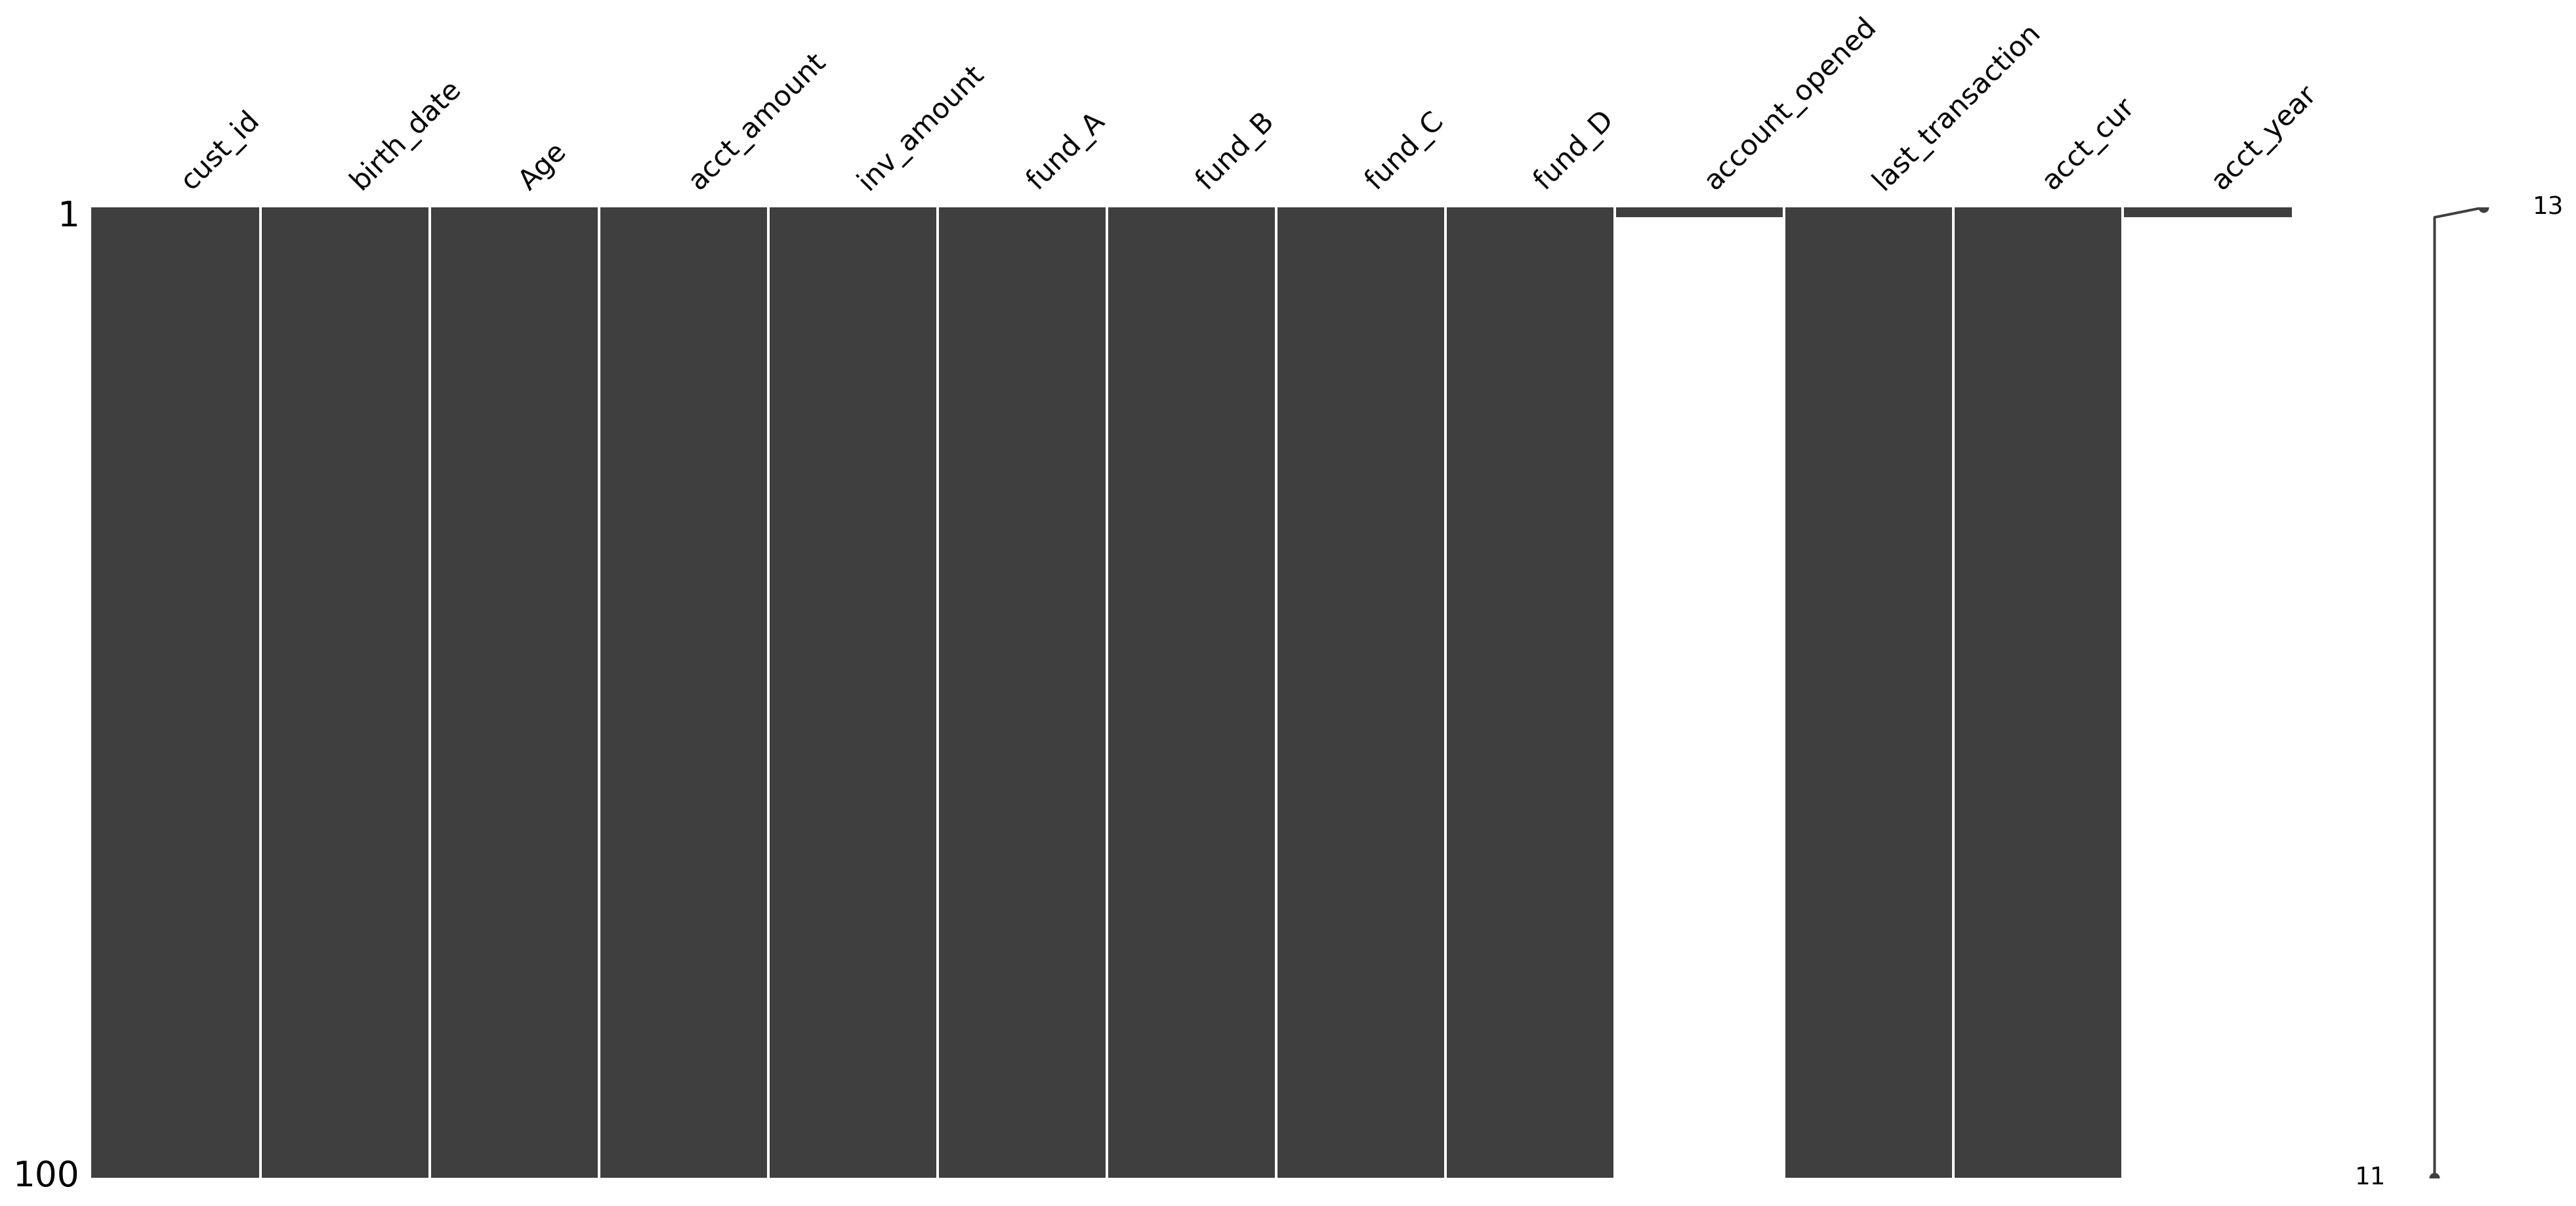

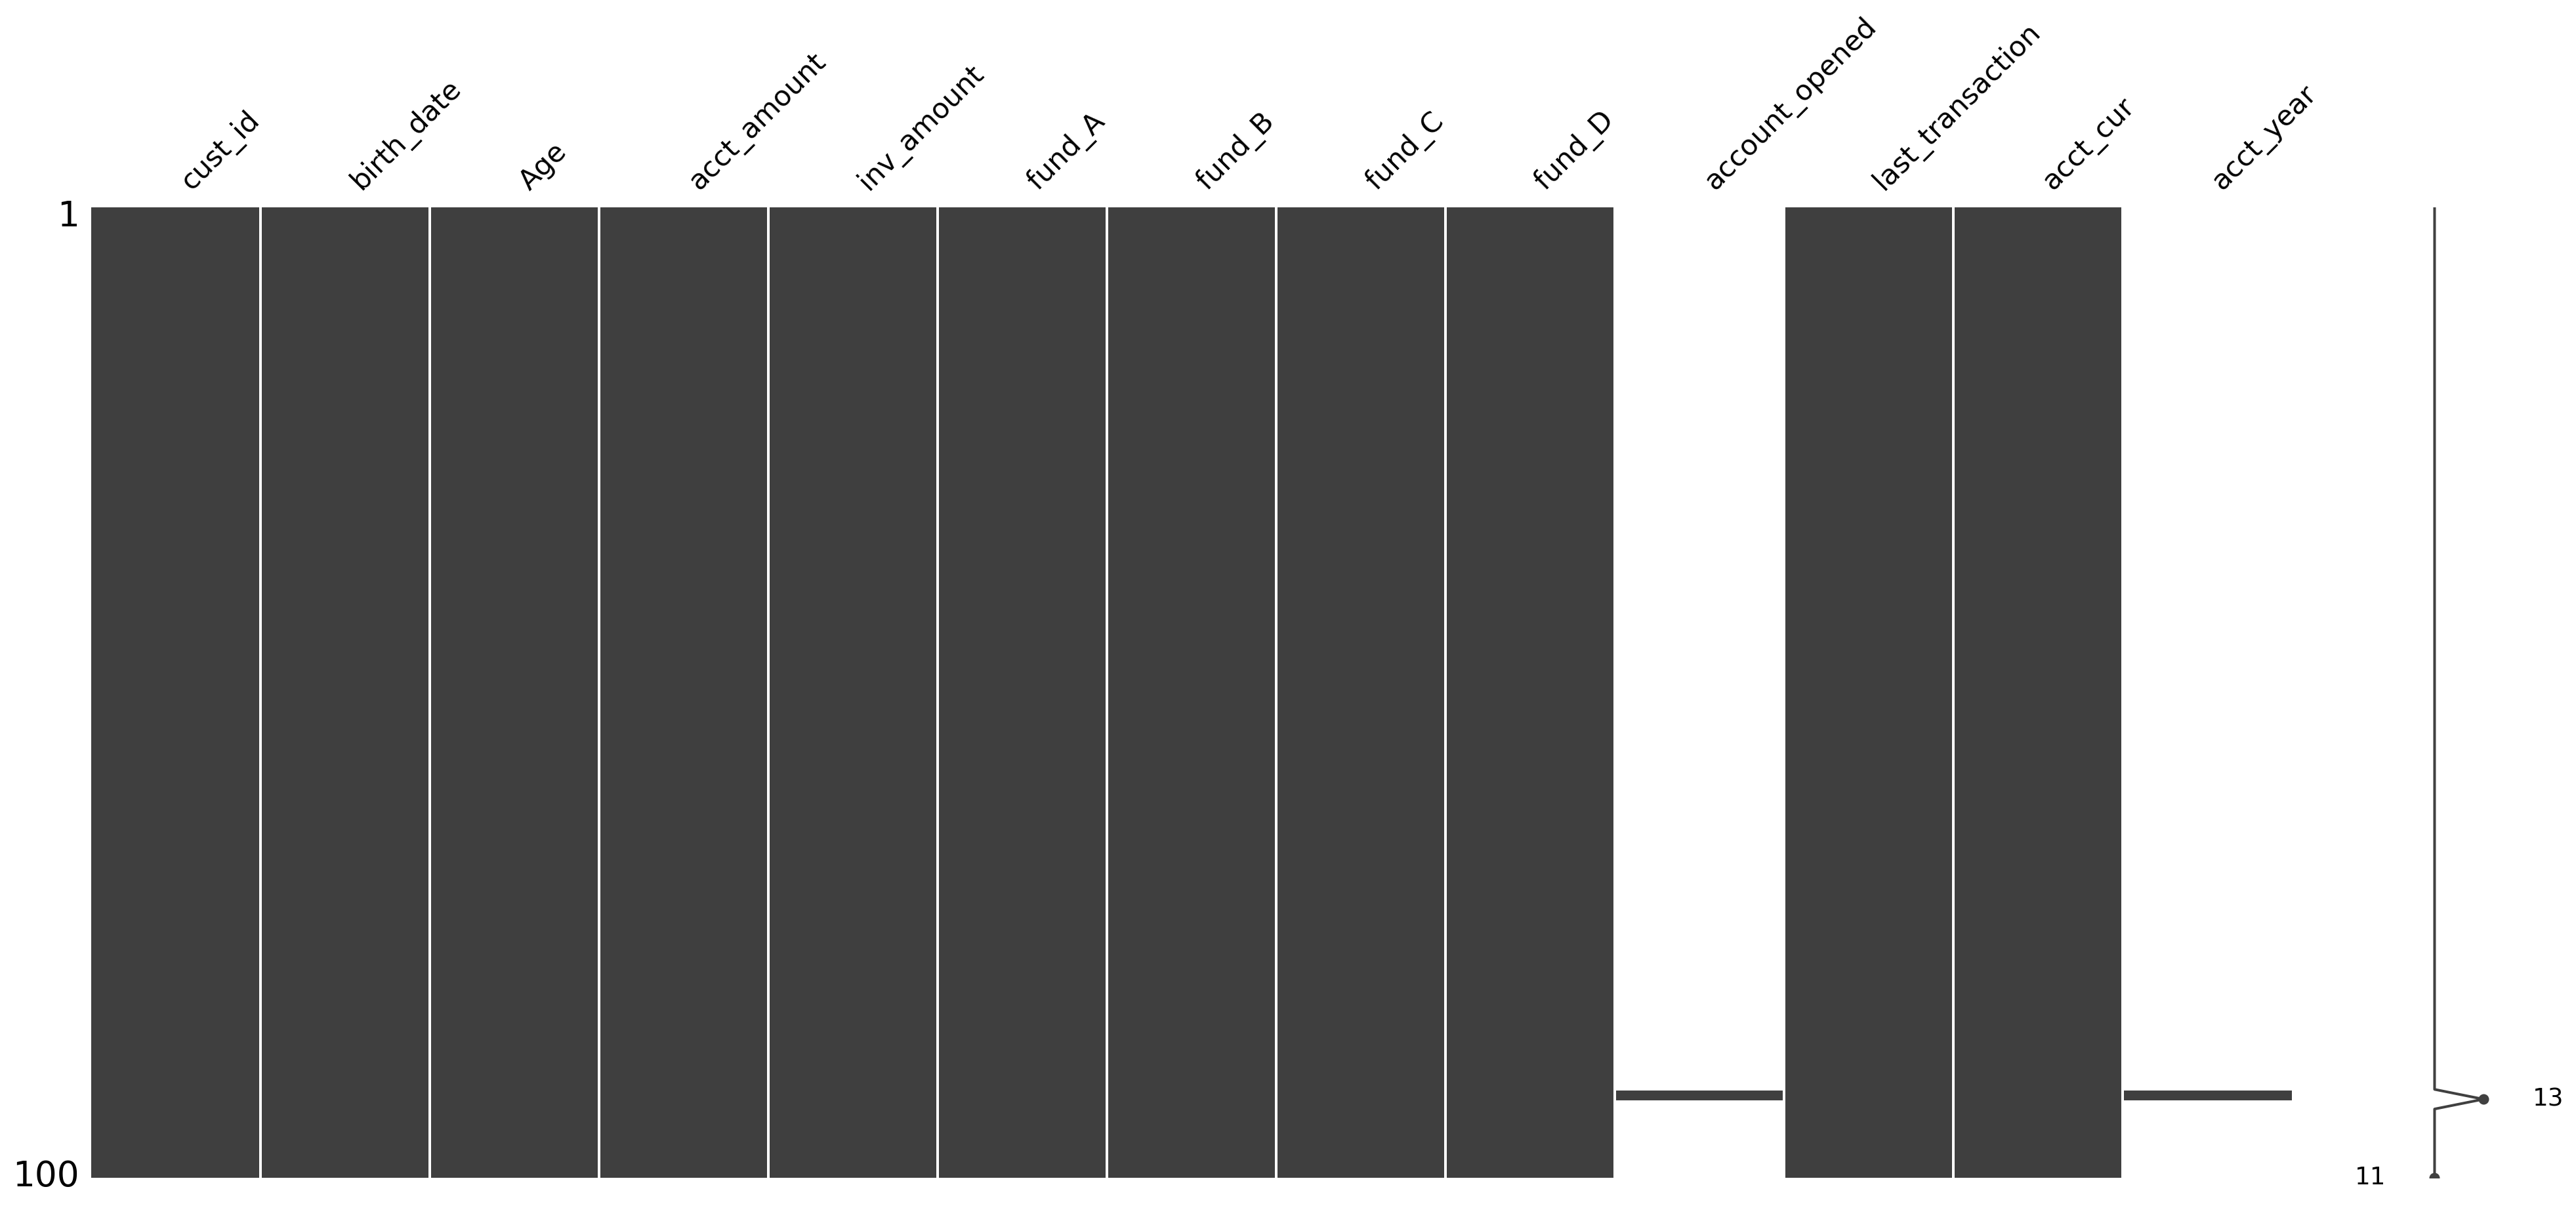

cust_id              0
birth_date           0
Age                  0
acct_amount          0
inv_amount           0
fund_A               0
fund_B               0
fund_C               0
fund_D               0
account_opened      99
last_transaction     0
acct_cur             0
acct_year           99
dtype: int64


In [3]:
# Import the course packages
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import missingno as msno
import fuzzywuzzy
import recordlinkage 

banking = pd.read_csv('datasets/banking_dirty.csv', index_col = 'Unnamed: 0')

# Add an column and modify rows 
banking['acct_cur'] = 'euro'# or pd.NA for missing values
banking.loc[[0], 'account_opened'] = '2018-03-05'
banking.loc[[2], 'account_opened'] = 'January 26, 2018'
banking.loc[[3], 'account_opened'] = '21-14-17'

# Find values of acct_cur that are equal to 'euro'
acct_eu = banking['acct_cur'] == 'euro'

# Convert acct_amount where it is in euro to dollars
banking.loc[acct_eu, 'acct_amount'] = banking.loc[acct_eu, 'acct_amount'] * 1.1

# Unify acct_cur column by changing 'euro' values to 'dollar'
banking.loc[acct_eu, 'acct_cur'] = 'dollar'

# Assert that only dollar currency remains
assert banking['acct_cur'].unique() == 'dollar'

# Print the header of account_opened
print(banking['account_opened'].head())

# Convert account_opened to datetime
banking['account_opened'] = pd.to_datetime(banking['account_opened'],
                                           # Infer datetime format
                                           infer_datetime_format = True,
                                           # Return missing value for error
                                           errors = 'coerce') 

# Get year of account opened
banking['acct_year'] = banking['account_opened'].dt.strftime('%Y')

# Print acct_year
print(banking['acct_year'])

banking['birth_date'].info()

# Store fund columns to sum against
fund_columns = ['fund_A', 'fund_B', 'fund_C', 'fund_D']

# Find rows where fund_columns row sum == inv_amount
inv_equ = banking[fund_columns].sum(axis=1) == banking['inv_amount']

# Store consistent and inconsistent data
consistent_inv = banking[inv_equ]
inconsistent_inv = banking[~inv_equ]

# Store consistent and inconsistent data
print("Number of inconsistent investments: ", inconsistent_inv.shape[0])
print("Number of consistent investments: ", consistent_inv.shape[0])

# Convert birth_date to datetime
banking['birth_date'] = pd.to_datetime(banking['birth_date'],
                                           # Infer datetime format
                                           infer_datetime_format = True,
                                           # Return missing value for error
                                           errors = 'coerce') 

# Store today's date and find ages
today = dt.date.today()
ages_manual = today.year - banking['birth_date'].dt.year

# Find rows where age column == ages_manual
age_equ = ages_manual == banking['Age']

# Store consistent and inconsistent data
consistent_ages = banking[age_equ]
inconsistent_ages = banking[~age_equ]

# Store consistent and inconsistent data
print("Number of inconsistent ages: ", inconsistent_ages.shape[0])
print("Number of consistent ages: ", consistent_ages.shape[0])

# Print number of missing values in banking
print(banking.isna().sum())

# Visualize missingness matrix
msno.matrix(banking)
plt.show()

# Isolate missing and non missing values of inv_amount
missing_investors = banking[banking['inv_amount'].isna()]
investors = banking[~banking['inv_amount'].isna()]

# Describe complete DataFrame
investors.describe()

# Describe missing DataFrame
missing_investors.describe()

# Sort banking by age and visualize
banking_sorted = banking.sort_values(by='Age')
msno.matrix(banking_sorted)
plt.show()

# Drop missing values of cust_id
banking_fullid = banking.dropna(subset = ['cust_id'])

# Compute estimated acct_amount
acct_imp = banking_fullid['inv_amount'] * 5

# Impute missing acct_amount with corresponding acct_imp
banking_imputed = banking_fullid.fillna({'acct_amount': acct_imp})

# Print number of missing values
print(banking_imputed.isna().sum())


# There are only 8 and 92 rows affected by *inconsistent inv_amount and age values*, respectively. In this case, it's best to investigate the underlying data sources before deciding on a course of action!

CHAPTER 4: RECORD LINKAGE
----
## Chapter 4.1: Comparing strings

Awesome work on chapter 3! Welcome to the final chapter of this course, where we'll discover the world of record linkage. But before we get deep dive into record linkage, let's sharpen our understanding of string similarity and minimum edit distance.
Minimum edit distance
Minimum edit distance is a systematic way to identify how close 2 strings are. For example, let's take a look at the following two words: intention, and execution. The minimum edit distance between them is the least possible amount of steps, that could get us from the word intention to execution, with the available operations being inserting new characters, deleting them, substituting them, and transposing consecutive characters.
To get from intention to execution, we first start off by deleting I from intention, and adding C between E and N. Our minimum edit distance so far is 2, since these are two operations.
Then we substitute the first N with E, T with X, and N with U, leading us to execution! With the minimum edit distance being 5.
The lower the edit distance, the closer two words are. For example, the two different typos of reading have a minimum edit distance of 1 between them and reading.

### Minimum edit distance algorithms

There's a variety of algorithms based on edit distance that differ on which operations they use, how much weight attributed to each operation, which type of strings they're suited for and more, with a variety of packages to get each similarity.
For this lesson, we'll be comparing strings using Levenshtein distance since it's the most general form of string matching by using the thefuzz package.

### Simple string comparison

thefuzz is a package to perform string comparison. We first import fuzz from thefuzz, which allow us to compare between single strings. Here we use fuzz's WRatio function to compute the similarity between reading and its typo, inputting each string as an argument. For any comparison function using thefuzz, our output is a score from 0 to 100 with 0 being not similar at all, 100 being an exact match. Do not confuse this with the minimum edit distance score from earlier, where a lower minimum edit distance means a closer match.

### Partial strings and different orderings

The WRatio function is highly robust against partial string comparison with different orderings. For example here we compare the strings Houston Rockets and Rockets, and still receive a high similarity score. The same can be said for the strings Houston Rockets vs Los Angeles Lakers and Lakers vs Rockets, where the team names are only partial and they are differently ordered.

### Comparison with arrays

We can also compare a string with an array of strings by using the extract function from the process module from fuzzy wuzzy. Extract takes in a string, an array of strings, and the number of possible matches to return ranked from highest to lowest. It returns a list of tuples with 3 elements, the first one being the matching string being returned, the second one being its similarity score, and the third one being its index in the array.

### Collapsing categories with string similarity

In chapter 2, we learned that collapsing data into categories is an essential aspect of working with categorical and text data, and we saw how to manually replace categories in a column of a DataFrame. But what if we had so many inconsistent categories that a manual replacement is simply not feasible? We can easily do that with string similarity!

### Collapsing categories with string matching

Say we have DataFrame named survey containing answers from respondents from the state of New York and California asking them how likely are you to move on a scale of 0 to 5. The state field was free text and contains hundreds of typos. Remapping them manually would take a huge amount of time. Instead, we'll use string similarity. We also have a category DataFrame containing the correct categories for each state. Let's collapse the incorrect categories with string matching!

### Collapsing all of the state

We first create a for loop iterating over each correctly typed state in the categories DataFrame. For each state, we find its matches in the state column of the survey DataFrame, returning all possible matches by setting the limit argument of extract to the length of the survey DataFrame. Then we iterate over each potential match, isolating the ones only with a similarity score higher or equal than 80 with an if statement. Then for each of those returned strings, we replace it with the correct state using the loc method.

### Record linkage

Record linkage attempts to join data sources that have similarly fuzzy duplicate values, so that we end up with a final DataFrame with no duplicates by using string similarity. We'll cover record linkage in more detail in the next couple of lessons.

## Exercise 4.1.1

### The cutoff point

In this exercise, and throughout this chapter, you'll be working with the `restaurants` DataFrame which has data on various restaurants. Your ultimate goal is to create a restaurant recommendation engine, but you need to first clean your data.

This version of `restaurants` has been collected from many sources, where the `cuisine_type` column is riddled with typos, and should contain only `italian`, `american` and `asian` cuisine types. There are so many unique categories that remapping them manually isn't scalable, and it's best to use string similarity instead.

Before doing so, you want to establish the cutoff point for the similarity score using the `thefuzz`'s `process.extract()` function by finding the similarity score of the most distant typo of each category.

### Instructions 

- Import `process` from `thefuzz`.
- Store the unique `cuisine_types` into `unique_types`.
- Calculate the similarity of `'asian'`, `'american'`, and `'italian'` to all possible `cuisine_types` using `process.extract()`, while returning all possible matches.

### Remapping categories II

In the last exercise, you determined that the distance cutoff point for remapping typos of `'american'`, `'asian'`, and `'italian'` cuisine types stored in the `cuisine_type` column should be 80.

In this exercise, you're going to put it all together by finding matches with similarity scores equal to or higher than 80 by using `fuzywuzzy.process`'s `extract()` function, for each correct cuisine type, and replacing these matches with it. Remember, when comparing a string with an array of strings using `process.extract()`, the output is a list of tuples where each is formatted like:

```
(closest match, similarity score, index of match)
```

### Instructions 

- Return all of the unique values in the `cuisine_type` column of `restaurants`.
- As a first step, create a list of all possible matches, comparing `'italian'` with the restaurant types listed in the `cuisine_type` column.
- Within the `for loop`, use an `if statement` to check whether the similarity score in each match is greater than or equal to 80.
- If it is, use `.loc` to select rows where `cuisine_type` in restaurants is equal to the current match (which is the first element of match), and reassign them to be `'italian'`.
- Using the variable `cuisine` to iterate through `categories`, embed your code from the previous step in an outer `for loop`.
- Inspect the final result.


## Chapter 4.2: Generating pairs

Great work with lesson 1 - you now have a solid understanding how to calculate string similarity.

### Motivation

At the end of the last video exercise, we saw how record linkage attempts to join data sources with fuzzy duplicate values. For example here are two DataFrames containing NBA games and their schedules. They've both been scraped from different sites and we would want to merge them together and have one DataFrame containing all unique games.

### When joins won't work

We see that there are duplicates values in both DataFrames with different naming marked here in red, and non duplicate values, marked here in green. Since there are games happening at the same time, no common unique identifier between the DataFrames, and the events are differently named, a regular join or merge will not work. This is where record linkage comes in.

### Record linkage

Record linkage is the act of linking data from different sources regarding the same entity. Generally, we clean two or more DataFrames, generate pairs of potentially matching records, score these pairs according to string similarity and other similarity metrics, and link them. All of these steps can be achieved with the recordlinkage package, let's find how!

### Our DataFrames

Here we have two DataFrames, census_A, and census_B, containing data on individuals throughout the states. We want to merge them while avoiding duplication using record linkage, since they are collected manually and are prone to typos, there are no consistent IDs between them.

### Generating pairs

We first want to generate pairs between both DataFrames. Ideally, we want to generate all possible pairs between our DataFrames.
But what if we had big DataFrames and ended up having to generate millions if not billions of pairs? It wouldn't prove scalable and could seriously hamper development time.

### Blocking

This is where we apply what we call blocking, which creates pairs based on a matching column, which is in this case, the state column, reducing the number of possible pairs.

### Generating pairs

To do this, we first start off by importing recordlinkage. We then use the recordlinkage dot Index function, to create an indexing object. This essentially is an object we can use to generate pairs from our DataFrames. To generate pairs blocked on state, we use the block method, inputting the state column as input. Once the indexer object has been initialized, we generate our pairs using the dot index method, which takes in the two dataframes.
The resulting object, is a pandas multi index object containing pairs of row indices from both DataFrames, which is a fancy way to say it is an array containing possible pairs of indices that makes it much easier to subset DataFrames on.

### Comparing the DataFrames

Since we've already generated our pairs, it's time to find potential matches. We first start by creating a comparison object using the recordlinkage dot compare function. This is similar to the indexing object we created while generating pairs, but this one is responsible for assigning different comparison procedures for pairs. Let's say there are columns for which we want exact matches between the pairs. To do that, we use the exact method. It takes in the column name in question for each DataFrame, which is in this case date_of_birth and state, and a label argument which lets us set the column name in the resulting DataFrame. Now in order to compute string similarities between pairs of rows for columns that have fuzzy values, we use the dot string method, which also takes in the column names in question, the similarity cutoff point in the threshold argument, which takes in a value between 0 and 1, which we here set to 0.85. Finally to compute the matches, we use the compute function, which takes in the possible pairs, and the two DataFrames in question. Note that you need to always have the same order of DataFrames when inserting them as arguments when generating pairs, comparing between columns, and computing comparisons.

### Finding matching pairs

The output is a multi index DataFrame, where the first index is the row index from the first DataFrame, or census A, and the second index is a list of all row indices in census B. The columns are the columns being compared, with values being 1 for a match, and 0 for not a match.

### Finding the only pairs we want

To find potential matches, we just filter for rows where the sum of row values is higher than a certain threshold. Which in this case higher or equal to 2. But we'll dig deeper into these matches and see how to use them to link our census DataFrames in the next lesson.

## Exercise 4.2.1

### Pairs of restaurants

In the last lesson, you cleaned the `restaurants` dataset to make it ready for building a restaurants recommendation engine. You have a new DataFrame named `restaurants_new` with new restaurants to train your model on, that's been scraped from a new data source.

You've already cleaned the `cuisine_type` and `city` columns using the techniques learned throughout the course. However you saw duplicates with typos in `restaurants` names that require record linkage instead of joins with `restaurants`.

In this exercise, you will perform the first step in record linkage and generate possible pairs of rows between `restaurants` and `restaurants_new`.

### Instructions 

- Instantiate an indexing object by using the `Index()` function from `recordlinkage`.
- Block your pairing on `cuisine_type` by using `indexer`'s' `.block()` method.
- Generate pairs by indexing `restaurants` and `restaurants_new` in that order.

## Exercise 4.2.2

### Similar restaurants

In the last exercise, you generated pairs between `restaurants` and `restaurants_new` in an effort to cleanly merge both DataFrames using record linkage.

When performing record linkage, there are different types of matching you can perform between different columns of your DataFrames, including exact matches, string similarities, and more.

Now that your pairs have been generated and stored in pairs, you will find exact matches in the `city` and `cuisine_type` columns between each pair, and similar strings for each pair in the `name` column.

### Instructions 

- Instantiate a comparison object using the `recordlinkage.Compare()` function.
- Use the appropriate `comp_cl` method to find exact matches between the `city` and `cuisine_type` columns of both DataFrames.
- Use the appropriate `comp_cl` method to find similar strings with a `0.8` similarity threshold in the `name` column of both DataFrames.
- Compute the comparison of the pairs by using the `.compute()` method of `comp_cl`.
- Print out `potential_matches`, the columns are the columns being compared, with values being 1 for a match, and 0 for not a match for each pair of rows in your DataFrames. To find potential matches, you need to find rows with more than matching value in a column. You can find them with

```
potential_matches[potential_matches.sum(axis = 1) >= n]
```
Where `n` is the minimum number of columns you want matching to ensure a proper duplicate find, what do you think should the value of `n` be?


## Chapter 4.3: Linking DataFrames

Awesome work on the first 2 lessons! You've made it to the last lesson of this course!

### Record linkage

At this point, you've generated your pairs, compared them, and scored them. Now it's time to link your data!

### Our DataFrames

Remember our census DataFrames from the video of the previous lesson?

### What we've already done

We've already generated pairs between them, compared four of their columns, two for exact matches and two for string similarity alongside a 0.85 threshold, and found potential matches.

### What we're doing now

Now it's time to link both census DataFrames.

### Our potential matches

Let's look closely at our potential matches. It is a multi-index DataFrame, where we have two index columns, record id 1, and record id 2.
The first index column, stores indices from census A.
The second index column, stores all possible indices from census_B, for each row index of census_A.
The columns of our potential matches are the columns we chose to link both DataFrames on, where the value is 1 for a match, and 0 otherwise.

### Probable matches

The first step in linking DataFrames, is to isolate the potentially matching pairs to the ones we're pretty sure of. We saw how to do this in the previous lesson, by subsetting the rows where the row sum is above a certain number of columns, in this case 3. The output is row indices between census A and census B that are most likely duplicates. Our next step is to extract the one of the index columns, and subsetting its associated DataFrame to filter for duplicates.
Here we choose the second index column, which represents row indices of census B. We want to extract those indices, and subset census_B on them to remove duplicates with census_A before appending them together.

### Get the indices

We can access a DataFrame's index using the index attribute. Since this is a multi index DataFrame, it returns a multi index object containing pairs of row indices from census_A and census_B respectively. We want to extract all census_B indices, so we chain it with the get_level_values method, which takes in which column index we want to extract its values. We can either input the index column's name, or its order, which is in this case 1.
To find the duplicates in census B, we simply subset on all indices of census_B, with the ones found through record linkage. You can choose to examine them further for similarity with their duplicates in census_A, but if you're sure of your analysis, you can go ahead and find the non duplicates by repeating the exact same line of code, except by adding a tilde at the beginning of your subset. Now that you have your non duplicates, all you need is a simple append using the DataFrame append method of census A, and you have your linked Data!
To recap, what we did was build on top of our previous work in generating pairs, comparing across columns and finding potential matches. We then isolated all possible matches, where there are matches across 3 columns or more, ensuring we tightened our search for duplicates across both DataFrames before we link them. Extracted the row indices of census_B where there are duplicates. Found rows of census_B where they are not duplicated with census_A by using the tilde symbol. And linked both DataFrames for full census results!

## Exercise 4.3

### Linking them together!

In the last lesson, you've finished the bulk of the work on your effort to link `restaurants` and `restaurants_new`. You've generated the different pairs of potentially matching rows, searched for exact matches between the `cuisine_type` and `city` columns, but compared for similar strings in the `name` column. You stored the DataFrame containing the scores in `potential_matches`.

Now it's finally time to link both DataFrames. You will do so by first extracting all row indices of `restaurants_new` that are matching across the columns mentioned above from `potential_matches`. Then you will subset `restaurants_new` on these indices, then append the non-duplicate values to `restaurants`.

### Instructions

- Isolate instances of `potential_matches` where the row sum is above or equal to 3 by using the `.sum()` method.
- Extract the second column index from `matches`, which represents row indices of matching record from `restaurants_new` by using the `.get_level_values()` method.
- Subset `restaurants_new` for rows that are not in `matching_indices`.
- Append `non_dup` to `restaurants`.


In [4]:
# Import the course packages
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import missingno as msno
import fuzzywuzzy
import recordlinkage 

# Import the course datasets
restaurants = pd.read_csv('datasets/restaurants.mod.csv', index_col = 'Unnamed: 0')
restaurants_new = pd.read_csv('datasets/restaurants_new.mod.csv', index_col = 'Unnamed: 0')


categories1 = {'cuisine': ['italian', 'asian', 'american']}
categories = pd.DataFrame(categories1)

# Import process from thefuzz
from thefuzz import process

# Store the unique values of cuisine_type in unique_types
unique_types = restaurants['cuisine_type'].unique()

# Calculate similarity of 'asian' to all values of unique_types
print(process.extract('asian', unique_types, limit = len(unique_types)))

# Calculate similarity of 'american' to all values of unique_types
print(process.extract('american', unique_types, limit = len(unique_types)))

# Calculate similarity of 'italian' to all values of unique_types
print(process.extract('italian', unique_types, limit = len(unique_types)))
    
# Iterate through categories
for cuisine in categories['cuisine']:  
  # Create a list of matches, comparing cuisine with the cuisine_type column
  matches = process.extract(cuisine, restaurants['cuisine_type'], limit=restaurants.shape[0])

  # Iterate through the list of matches
  for match in matches:
     # Check whether the similarity score is greater than or equal to 80
    if match[1] >= 80:
      # If it is, select all rows where the cuisine_type is spelled this way, and set them to the correct cuisine
      restaurants.loc[restaurants['cuisine_type'] == match[0], 'cuisine_type'] = cuisine

# Iterate through categories (THE SAME AS ABOVE)
for cuisine in categories['cuisine']:  
  # Create a list of matches, comparing cuisine with the cuisine_type column
  matches = process.extract(cuisine, restaurants_new['cuisine_type'], limit=len(restaurants_new.cuisine_type))

  # Iterate through the list of matches
  for match in matches:
     # Check whether the similarity score is greater than or equal to 80
    if match[1] >= 80:
      # If it is, select all rows where the cuisine_type is spelled this way, and set them to the correct cuisine
      restaurants_new.loc[restaurants_new['cuisine_type'] == match[0], 'cuisine_type'] = cuisine
      
# Inspect the final result
print(restaurants['cuisine_type'].unique())
# Inspect the final result
print(restaurants_new['cuisine_type'].unique())

# Create an indexer and object and find possible pairs
indexer = recordlinkage.Index()

# Block pairing on cuisine_type
indexer.block('cuisine_type')

# Generate pairs
pairs = indexer.index(restaurants, restaurants_new)

# Create a comparison object
comp_cl = recordlinkage.Compare()

# Find exact matches on city, cuisine_types 
comp_cl.exact('city', 'city', label='city')
comp_cl.exact('cuisine_type', 'cuisine_type', label = 'cuisine_type')

# Find similar matches of rest_name
comp_cl.string('name', 'name', label='name', threshold = 0.8) 

# Get potential matches and print
potential_matches = comp_cl.compute(pairs, restaurants, restaurants_new)
print(potential_matches)

# Isolate potential matches with row sum >=3
matches = potential_matches[potential_matches.sum(axis = 1) >= 3]

# For this example, tightening your selection criteria will ensure good duplicate finds!

# Get values of second column index of matches
matching_indices = matches.index.get_level_values(1)

# Subset restaurants_new based on non-duplicate values
non_dup = restaurants_new[~restaurants_new.index.isin(matching_indices)]

# Append non_dup to restaurants
full_restaurants = pd.concat([restaurants, non_dup], ignore_index=True)
print(full_restaurants)

[('asian', 100), ('asiane', 91), ('asiann', 91), ('asiian', 91), ('asiaan', 91), ('asianne', 83), ('asiat', 80), ('italiann', 72), ('italiano', 72), ('italianne', 72), ('italiaan', 68), ('italiian', 68), ('itallian', 68), ('italian', 67), ('amurican', 62), ('american', 62), ('ameerican', 60), ('aamerican', 60), ('ameriican', 60), ('amerrican', 60), ('ameerrican', 60), ('ammereican', 60), ('americann', 57), ('americano', 57), ('ammericann', 54), ('americin', 51), ('amerycan', 51), ('america', 50), ('merican', 50)]
[('american', 100), ('ameerican', 94), ('aamerican', 94), ('ameriican', 94), ('amerrican', 94), ('americann', 94), ('americano', 94), ('america', 93), ('merican', 93), ('ameerrican', 89), ('ammereican', 89), ('ammericann', 89), ('amurican', 88), ('americin', 88), ('amerycan', 88), ('asian', 62), ('asiane', 57), ('asiann', 57), ('asiian', 57), ('asiaan', 57), ('asianne', 53), ('italian', 53), ('italiann', 50), ('italiano', 50), ('italiaan', 50), ('italiian', 50), ('itallian', 5

['american' 'asian' 'italian']
['american' 'asian' 'italian']


        city  cuisine_type  name
0   0      0             1   0.0
    1      0             1   0.0
    2      0             1   0.0
    3      1             1   0.0
    4      0             1   0.0
...      ...           ...   ...
335 75     0             1   0.0
    76     0             1   0.0
    77     0             1   0.0
    78     0             1   0.0
    79     0             1   0.0

[10991 rows x 3 columns]
                          name                       addr               city  \
0    arnie morton's of chicago   435 s. la cienega blv .         los angeles   
1           art's delicatessen       12224 ventura blvd.         studio city   
2                    campanile       624 s. la brea ave.         los angeles   
3                        fenix    8358 sunset blvd. west           hollywood   
4           grill on the alley           9560 dayton way         los angeles   
..                         ...                        ...                ...   
405               

::: {.callout-tip collapse="false"}
## Important
Another code that is similar to the one in the previous code
```python
# Iterate through categories (THE SAME AS ABOVE)
for cuisine in categories:  
  # Create a list of matches, comparing cuisine with the cuisine_type column
  matches = process.extract(cuisine, restaurants['cuisine_type'], limit=len(restaurants.cuisine_type))

  # Iterate through the list of matches
  for match in matches:
     # Check whether the similarity score is greater than or equal to 80
    if match[1] >= 80:
      # If it is, select all rows where the cuisine_type is spelled this way, and set them to the correct cuisine
      restaurants.loc[restaurants['cuisine_type'] == match[0]] = cuisine
      
# Inspect the final result
print(restaurants['cuisine_type'].unique())
```
:::

EXPLORE DATASETS
----

Use the DataFrames imported in the first cell to explore the data and practice your skills!

- For each DataFrame, inspect the data types of each column and, where needed, clean and convert columns into the correct data type. You should also rename any columns to have more descriptive titles.

- Identify and remove all the duplicate rows in `ride_sharing`.

- Inspect the unique values of all the columns in `airlines` and clean any inconsistencies.

- For the `airlines` DataFrame, create a new column called `International` from `dest_region`, where values representing US regions map to `False` and all other regions map to `True`.

- The `banking` DataFrame contains out of date ages. Update the `Age` column using today's date and the `birth_date` column.

- Clean the `restaurants_new` DataFrame so that it better matches the categories in the `city` and `type` column of the `restaurants` DataFrame. Afterward, given typos in restaurant names, use record linkage to generate possible pairs of rows between `restaurants` and `restaurants_new` using criteria you think is best.
